In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
# Função para realizar PCA
def pca(dados, n_componentes):
    # Calcular a matriz de covariância
    matriz_covariancia = np.cov(dados.T)

    # Calcular autovalores e autovetores
    autovalores, autovetores = np.linalg.eig(matriz_covariancia)

    # Ordenar os autovalores e autovetores em ordem decrescente
    indices_ordenados = np.argsort(autovalores)[::-1]
    autovalores_ordenados = autovalores[indices_ordenados]
    autovetores_ordenados = autovetores[:, indices_ordenados]

    # Selecionar os primeiros n_componentes autovetores
    componentes_principais = autovetores_ordenados[:, :n_componentes]

    # Projetar os dados nas novas dimensões
    dados_projetados = np.dot(dados, componentes_principais)

    return dados_projetados, autovalores_ordenados

In [7]:
# Função para calcular a variância explicada
def variancia_explicada(autovalores, n_componentes):
    variancia_total = np.sum(autovalores)
    variancia_acumulada = np.sum(autovalores[:n_componentes])
    return variancia_acumulada / variancia_total


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins.csv')

# Separar atributos e classes
dados = df.iloc[:, :-1].values  # As 4 primeiras colunas são os atributos
classes = df.iloc[:, -1].values  # A última coluna é a classe (espécie)

dados_normalizados = (dados - np.mean(dados, axis=0)) / np.std(dados, axis=0)

# Projetar os dados em 2 dimensões usando PCA
dados_projetados, autovalores = pca(dados_normalizados, 2)



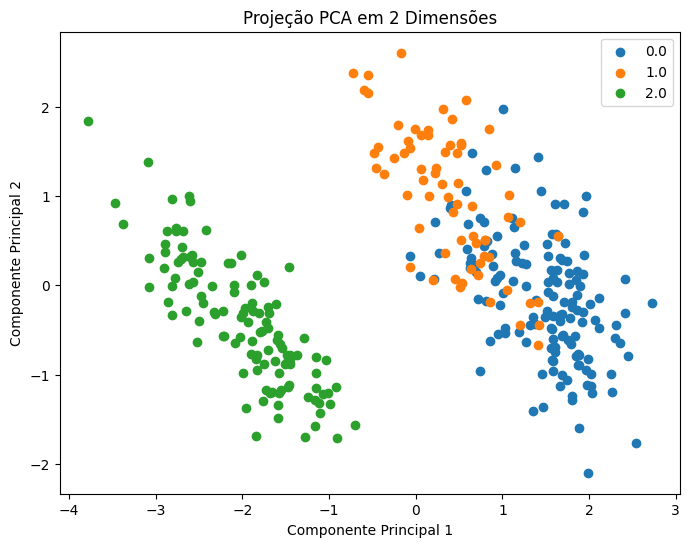

In [13]:
# Plotando a projeção em 2 dimensões
plt.figure(figsize=(8, 6))
for especie in np.unique(classes):
    indice = np.where(classes == especie)
    plt.scatter(dados_projetados[indice, 0], dados_projetados[indice, 1], label=especie)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Projeção PCA em 2 Dimensões')
plt.show()



In [14]:
# Calcular a variância explicada para 1, 2, 3 e 4 componentes
for n in range(1, 5):
    variancia = variancia_explicada(autovalores, n)
    print(f'Variância explicada com {n} componentes: {variancia * 100:.2f}%')


Variância explicada com 1 componentes: 68.59%
Variância explicada com 2 componentes: 88.08%
Variância explicada com 3 componentes: 97.31%
Variância explicada com 4 componentes: 100.00%
